### 

CNN is used for models working with images

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow import keras 

In [2]:
xtrain = pd.read_csv('fashion_train.csv')
ytrain = pd.read_csv('fashion_train_labels.csv')
xtest = pd.read_csv('fashion_test.csv')
ytest = pd.read_csv('fashion_test_labels.csv')

In [3]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ytrain.head()

,0
0,9
1,0
2,0
3,3
4,0


In [5]:
label_dic = {0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',
            4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',
            9:'Ankle Boot'}

In [ ]:
#these are the labels values of the image present in the fashion set data


In [ ]:
#in this we need to provide the image as the input to the cnn 
# so there i snood need to flatten the input 


In [6]:
x= np.array(xtrain)
y = tf.keras.utils.to_categorical(np.array(ytrain),10)

In [7]:
# scaling the image pixel values
x= x/255.0


#### Assembling Neural Network model

In [8]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
#to provide a 2d view
from keras.layers.core import Dense,Flatten 
from keras.layers.pooling import MaxPool2D

#for optimzation 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

from keras.utils import np_utils


###### Building model architecture

In [11]:
model = Sequential()
#this is 1st hidden layer ie the 1st convolution layer
model.add(Conv2D(filters=6,kernel_size = (3,3), padding='same',
                input_shape=(28,28,1)))
#1 in input shape is the color of the image 

#adding pooling layer: this is for downsizing the image
model.add(MaxPool2D(pool_size=(2,2)))

#2nd convolution layer
#adding another convolution layer 
model.add(Conv2D(filters=16,kernel_size = (3,3), padding='valid'))

#2nd maxpooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#flattening the input
model.add(Flatten())

#adding dropout layer 
model.add(Dropout(0.2, seed= 100))

#to improve the efficiency so that the model learns the data better so we add more dense layers to the model
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
#the following code goes to the output layer
model.add(Dense(10,activation='softmax'))

###### We provide the model for the training

In [18]:
#optimizing the model

sgd = SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True)

model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'],
             optimizer=sgd)

In [19]:
#here we reshape the flattened image back to the original image
#since the cnn model does not take the flatten image as nput

x_train = x.reshape(x.shape[0],28,28,1)

In [20]:
history = model.fit(x_train, y , epochs=10,batch_size=1000, validation_split= 0.20)

Epoch 1/10
48/48 [==============================] - 6s 114ms/step - loss: 1.7049 - accuracy: 0.3811 - val_loss: 0.8461 - val_accuracy: 0.6663
Epoch 2/10
48/48 [==============================] - 6s 116ms/step - loss: 0.7880 - accuracy: 0.7076 - val_loss: 0.6472 - val_accuracy: 0.7450
Epoch 3/10
48/48 [==============================] - 5s 108ms/step - loss: 0.6463 - accuracy: 0.7573 - val_loss: 0.5678 - val_accuracy: 0.7807
Epoch 4/10
48/48 [==============================] - 5s 108ms/step - loss: 0.5878 - accuracy: 0.7805 - val_loss: 0.5333 - val_accuracy: 0.8026
Epoch 5/10
48/48 [==============================] - 5s 113ms/step - loss: 0.5487 - accuracy: 0.7956 - val_loss: 0.5051 - val_accuracy: 0.8152
Epoch 6/10
48/48 [==============================] - 6s 123ms/step - loss: 0.5200 - accuracy: 0.8077 - val_loss: 0.4844 - val_accuracy: 0.8185
Epoch 7/10
48/48 [==============================] - 6s 115ms/step - loss: 0.4977 - accuracy: 0.8165 - val_loss: 0.4619 - val_accuracy: 0.8290
Epoch 

In [21]:
# normalizing and reshaping the testing data
x_test = np.array(xtest)
x_test = x_test/255.0


In [24]:
x_test = x_test.reshape(xtest.shape[0],28,28,1)

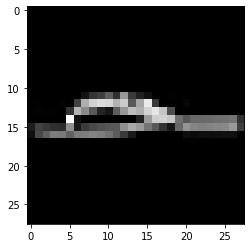

In [25]:
#image in index 8 in xtest

plt.imshow(x_test[8,:,:].reshape(28,28),cmap='gray')

##### Checking the predition of the model

In [26]:
#no of img, shape h and w , channel(ags of reshape)
p = model.predict(x_test[8,:,:].reshape(1,28,28,1))
p

array([[3.2228939e-03, 5.2592804e-04, 2.3063316e-03, 2.9152832e-03,
        9.8212925e-04, 7.8643620e-01, 1.2481711e-03, 1.8098019e-01,
        2.0519646e-02, 8.6326292e-04]], dtype=float32)

In [27]:
np.argmax(p)#7.8643620e-01

5

In [28]:
label_dic[5]

'Sandal'

In [ ]:
#we got a 78% prob that the predicted value is Sandal

In [ ]:
#here we get more accuracy than mlp

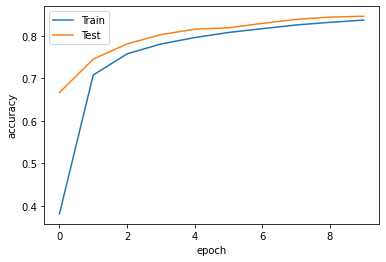

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'],loc='upper left')

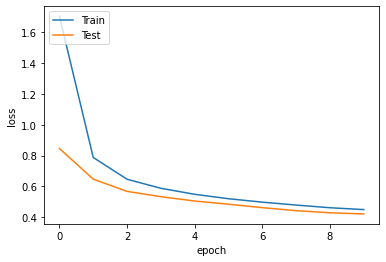

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Test'],loc='upper left')